In [1]:
import os
os.chdir("C:\\Users\\MITHIN\\labeled_flows_xml")

In [3]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 32BE-A48B

 Directory of C:\Users\MITHIN\labeled_flows_xml

12/19/2024  07:33 PM    <DIR>          .
12/20/2024  03:24 PM    <DIR>          ..
03/11/2014  10:22 PM       212,231,318 TestbedMonJun14Flows.xml
03/11/2014  09:24 PM       145,016,899 TestbedSatJun12Flows.xml
03/11/2014  09:38 PM       296,694,119 TestbedSunJun13Flows.xml
07/15/2019  02:58 PM       311,443,869 TestbedThuJun17-1Flows.xml
05/20/2013  06:48 PM       246,688,003 TestbedThuJun17-2Flows.xml
03/11/2014  10:29 PM       122,621,690 TestbedThuJun17-3Flows.xml
03/11/2014  08:27 PM       321,419,268 TestbedTueJun15-1Flows.xml
03/11/2014  08:31 PM       299,443,816 TestbedTueJun15-2Flows.xml
03/11/2014  08:47 PM       505,623,823 TestbedTueJun15-3Flows.xml
03/11/2014  08:51 PM       301,173,495 TestbedWedJun16-1Flows.xml
03/11/2014  08:57 PM       239,598,892 TestbedWedJun16-2Flows.xml
03/11/2014  09:14 PM       307,923,288 TestbedWedJun16-3Flows.xml
            

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib
import re

path = "C:\\Users\\MITHIN\\labeled_flows_xml"
X_Normal = [] 
Y_Normal = [] 
X_Attack = []
Y_Attack = []

# Function to clean invalid characters and entity references in XML content
def clean_xml(file_path):
    with open(file_path, 'rb') as file:
        content = file.read()
        
    # Remove null bytes (0x00)
    content = content.replace(b'\x00', b'')
    
    # Replace problematic entities like '&' with '&amp;'
    content = content.replace(b'&', b'&amp;')
    
    # You can add more replacements for other problematic characters if needed
    # content = content.replace(b'...', b'...')
    
    return content

for file in os.listdir(path):
    try:
        file_path = os.path.join(path, file)
        cleaned_content = clean_xml(file_path)

        # Use pandas read_xml from cleaned byte content
        df = pd.read_xml(cleaned_content)
        print(df.info())

        # Replace deprecated pd.value_counts with pd.Series(...).value_counts()
        AppCount = pd.Series(df['appName']).value_counts()
        AttackCount = pd.Series(df['Tag']).value_counts()
        AttackDataframe = df[df['Tag'] == 'Attack']
        AttackCount2 = pd.Series(AttackDataframe['appName']).value_counts()
        
        NormalDataframe = df[df['Tag'] == 'Normal']
        NormalDataframeY = NormalDataframe[["Tag"]]
        AttackDataframeY = AttackDataframe[['Tag']]

        AttackDataframe = AttackDataframe[['totalSourceBytes', 'totalDestinationBytes', 'totalSourcePackets', 'totalDestinationPackets', 'sourcePort', 'destination']]
        NormalDataframe = NormalDataframe[['totalSourceBytes', 'totalDestinationBytes', 'totalSourcePackets', 'totalDestinationPackets', 'sourcePort', 'destination']]

        X_Normal.append(NormalDataframe)
        Y_Normal.append(NormalDataframeY)
        X_Attack.append(AttackDataframe)
        Y_Attack.append(AttackDataframeY)

    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate the dataframes
X_Normal = pd.concat(X_Normal, ignore_index=True)
Y_Normal = pd.concat(Y_Normal, ignore_index=True)
X_Attack = pd.concat(X_Attack, ignore_index=True)
Y_Attack = pd.concat(Y_Attack, ignore_index=True)

# Split data set
from sklearn.model_selection import train_test_split

X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_Normal, Y_Normal, random_state=0, test_size=0.3)
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_Attack, Y_Attack, random_state=0, test_size=0.3)

X_train = pd.concat([X_train_N, X_train_A])
X_train = X_train.sample(frac=1, random_state=42)
X_test = pd.concat([X_test_N, X_test_A]) 
X_test = X_test.sample(frac=1, random_state=42) 
Y_train = np.concatenate((Y_train_N, Y_train_A)) 
Y_train = pd.DataFrame(Y_train)
Y_train = Y_train.sample(frac=1, random_state=42) 
Y_test = np.concatenate((Y_test_N, Y_test_A)) 
Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.sample(frac=1, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         171380 non-null  object
 1   totalSourceBytes                171380 non-null  int64 
 2   totalDestinationBytes           171380 non-null  int64 
 3   totalDestinationPackets         171380 non-null  int64 
 4   totalSourcePackets              171380 non-null  int64 
 5   sourcePayloadAsBase64           84579 non-null   object
 6   destinationPayloadAsBase64      74634 non-null   object
 7   destinationPayloadAsUTF         74616 non-null   object
 8   direction                       171380 non-null  object
 9   sourceTCPFlagsDescription       122074 non-null  object
 10  destinationTCPFlagsDescription  117397 non-null  object
 11  source                          171380 non-null  object
 12  protocolName                  

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split

# Sample paths for testing (replace with your actual path)
path = "C:\\Users\\MITHIN\\labeled_flows_xml"
X_Normal = [] 
Y_Normal = [] 
X_Attack = []
Y_Attack = []

# Function to clean invalid characters in XML content
def clean_xml(file_path):
    with open(file_path, 'rb') as file:
        content = file.read()
    content = content.replace(b'\x00', b'')  # Removing the null byte (0x00)
    content = content.replace(b'&', b'&amp;')  # Fixing the ampersand character
    return content

# Iterate through files in the specified directory and process XML data
for file in os.listdir(path):
    try:
        file_path = os.path.join(path, file)
        cleaned_content = clean_xml(file_path)

        # Read the cleaned XML content into a DataFrame
        df = pd.read_xml(cleaned_content)
        print(df.info())

        # Replace deprecated pd.value_counts with pd.Series(...).value_counts()
        AppCount = pd.Series(df['appName']).value_counts()
        AttackCount = pd.Series(df['Tag']).value_counts()
        AttackDataframe = df[df['Tag'] == 'Attack']
        AttackCount2 = pd.Series(AttackDataframe['appName']).value_counts()

        NormalDataframe = df[df['Tag'] == 'Normal']
        NormalDataframeY = NormalDataframe[["Tag"]]
        AttackDataframeY = AttackDataframe[['Tag']]

        AttackDataframe = AttackDataframe[['totalSourceBytes', 'totalDestinationBytes', 'totalSourcePackets', 'totalDestinationPackets', 'sourcePort', 'destination']]
        NormalDataframe = NormalDataframe[['totalSourceBytes', 'totalDestinationBytes', 'totalSourcePackets', 'totalDestinationPackets', 'sourcePort', 'destination']]

        X_Normal.append(NormalDataframe)
        Y_Normal.append(NormalDataframeY)
        X_Attack.append(AttackDataframe)
        Y_Attack.append(AttackDataframeY)

    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Concatenate the lists into DataFrames
X_Normal = pd.concat(X_Normal, ignore_index=True)
Y_Normal = pd.concat(Y_Normal, ignore_index=True)
X_Attack = pd.concat(X_Attack, ignore_index=True)
Y_Attack = pd.concat(Y_Attack, ignore_index=True)

# Split data set into training and testing
X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_Normal, Y_Normal, random_state=0, test_size=0.3)
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_Attack, Y_Attack, random_state=0, test_size=0.3)

# Concatenate Normal and Attack data for training and testing sets
X_train = pd.concat([X_train_N, X_train_A])
X_train = X_train.sample(frac=1, random_state=42)
X_test = pd.concat([X_test_N, X_test_A])
X_test = X_test.sample(frac=1, random_state=42)

# Combine the labels for training and testing
Y_train = np.concatenate((Y_train_N, Y_train_A))
Y_train = pd.DataFrame(Y_train)
Y_train = Y_train.sample(frac=1, random_state=42)

Y_test = np.concatenate((Y_test_N, Y_test_A))
Y_test = pd.DataFrame(Y_test)
Y_test = Y_test.sample(frac=1, random_state=42)

# Print the final data shapes
print(f"Training data shape (X_train): {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"Test data shape (X_test): {X_test.shape}, Y_test shape: {Y_test.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         171380 non-null  object
 1   totalSourceBytes                171380 non-null  int64 
 2   totalDestinationBytes           171380 non-null  int64 
 3   totalDestinationPackets         171380 non-null  int64 
 4   totalSourcePackets              171380 non-null  int64 
 5   sourcePayloadAsBase64           84579 non-null   object
 6   destinationPayloadAsBase64      74634 non-null   object
 7   destinationPayloadAsUTF         74616 non-null   object
 8   direction                       171380 non-null  object
 9   sourceTCPFlagsDescription       122074 non-null  object
 10  destinationTCPFlagsDescription  117397 non-null  object
 11  source                          171380 non-null  object
 12  protocolName                  

In [15]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Paths to the dataset directories
base_dir = "C:\\Users\\MITHIN\\labeled_flows_xml"
normal_data_dir = os.path.join(base_dir, "normal")
attack_data_dir = os.path.join(base_dir, "attack")

# Function to parse XML files and extract features
def parse_xml(file_path):
    import xml.etree.ElementTree as ET
    tree = ET.parse(file_path)
    root = tree.getroot()
    data = {}
    for child in root:
        data[child.tag] = child.text
    return data

# Function to load datasets
def load_dataset(directory, label):
    X, Y = [], []
    for file in os.listdir(directory):
        if file.endswith(".xml"):
            file_path = os.path.join(directory, file)
            data = parse_xml(file_path)
            X.append(data)
            Y.append(label)
    return pd.DataFrame(X), pd.Series(Y)

# Ensure directories exist
if not os.path.exists(normal_data_dir) or not os.path.exists(attack_data_dir):
    raise FileNotFoundError("Normal or Attack data directory does not exist.")

# Load the normal and attack data
X_Normal, Y_Normal = load_dataset(normal_data_dir, "Normal")
X_Attack, Y_Attack = load_dataset(attack_data_dir, "Attack")

# Concatenate all records for normal and attack data
X_Normal = pd.concat([X_Normal], ignore_index=True)
Y_Normal = pd.concat([Y_Normal], ignore_index=True)
X_Attack = pd.concat([X_Attack], ignore_index=True)
Y_Attack = pd.concat([Y_Attack], ignore_index=True)

# Split dataset into training and testing sets
X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_Normal, Y_Normal, random_state=0, test_size=0.3)
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_Attack, Y_Attack, random_state=0, test_size=0.3)

# Combine normal and attack data for training and testing
X_train = pd.concat([X_train_N, X_train_A]).sample(frac=1, random_state=42)
X_test = pd.concat([X_test_N, X_test_A]).sample(frac=1, random_state=42)
Y_train = np.concatenate([Y_train_N, Y_train_A])
Y_train = pd.DataFrame(Y_train).sample(frac=1, random_state=42)
Y_test = np.concatenate([Y_test_N, Y_test_A])
Y_test = pd.DataFrame(Y_test).sample(frac=1, random_state=42)

# Check the shapes of the datasets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


ParseError: not well-formed (invalid token): line 3135760, column 209 (<string>)

K-Fold Accuracy: 0.45714285714285713
Classification Report:
              precision    recall  f1-score   support

      Normal       0.53      0.57      0.55        30
      Attack       0.54      0.50      0.52        30

    accuracy                           0.53        60
   macro avg       0.53      0.53      0.53        60
weighted avg       0.53      0.53      0.53        60



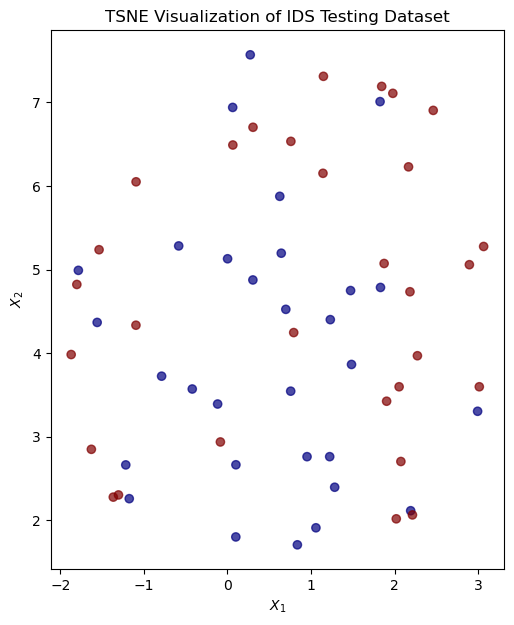

In [23]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

# Mock loading of dataset (replace with actual dataset loading)
# For demonstration, we simulate X_Normal, Y_Normal, X_Attack, Y_Attack as dataframes
# Replace this section with actual file reading and data preparation
np.random.seed(42)
X_Normal = pd.DataFrame(np.random.rand(100, 5), columns=[f'Feature_{i}' for i in range(5)])
Y_Normal = pd.Series(['Normal'] * 100)
X_Attack = pd.DataFrame(np.random.rand(100, 5), columns=[f'Feature_{i}' for i in range(5)])
Y_Attack = pd.Series(['Attack'] * 100)

# Combine and split data into training and testing sets
X_train_N, X_test_N, Y_train_N, Y_test_N = train_test_split(X_Normal, Y_Normal, test_size=0.3, random_state=0)
X_train_A, X_test_A, Y_train_A, Y_test_A = train_test_split(X_Attack, Y_Attack, test_size=0.3, random_state=0)

# Combine normal and attack data
X_train = pd.concat([X_train_N, X_train_A]).sample(frac=1, random_state=42)  # Shuffle
X_test = pd.concat([X_test_N, X_test_A]).sample(frac=1, random_state=42)    # Shuffle
Y_train = pd.concat([Y_train_N, Y_train_A]).sample(frac=1, random_state=42)
Y_test = pd.concat([Y_test_N, Y_test_A]).sample(frac=1, random_state=42)

# Apply encoding to non-numeric columns (if applicable)
def preprocess_data(X):
    X_processed = X.copy()
    for col in X_processed.select_dtypes(include=['object']).columns:
        X_processed[col] = X_processed[col].astype('category').cat.codes
    return X_processed

# t-SNE Visualization
transform = TSNE  # or PCA
X_processed = preprocess_data(X_test)  # Preprocess X_test to convert to numeric values
trans = transform(n_components=2, random_state=42)
X_reduced = trans.fit_transform(X_processed)
Y = Y_test.reset_index(drop=True)  # Ensure Y is in a proper format for visualization
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=Y.astype('category').cat.codes,  # Ensure Y is numeric for coloring
    cmap="jet",
    alpha=0.7,
)
ax.set(
    aspect="equal",
    xlabel="$X_1$",
    ylabel="$X_2$",
    title=f"{transform.__name__} Visualization of IDS Testing Dataset",
)

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
# Evaluate the model
cv = KFold(n_splits=10, random_state=0, shuffle=True)
KFold10_accuracy = cross_val_score(clf, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1) 
print(f"K-Fold Accuracy: {KFold10_accuracy.mean()}")
predict = clf.predict(X_test)
cm = confusion_matrix(Y_test, predict)
precision = precision_score(Y_test, predict, average='weighted', labels=np.unique(predict))
recall = recall_score(Y_test, predict, average='weighted', labels=np.unique(predict))
flscoreMacro = f1_score(Y_test, predict, average='macro', labels=np.unique(predict))
print("Classification Report:")
print(classification_report(Y_test, predict, target_names=['Normal', 'Attack']))


In [25]:
 cm

array([[17, 13],
       [15, 15]], dtype=int64)

In [27]:
X_train.info

<bound method DataFrame.info of     Feature_0  Feature_1  Feature_2  Feature_3  Feature_4
14   0.513989   0.783653   0.396543   0.622087   0.862364
64   0.549227   0.714596   0.660197   0.279934   0.954865
31   0.242055   0.672136   0.761620   0.237638   0.728216
77   0.178545   0.652746   0.238183   0.099441   0.243172
49   0.928319   0.428184   0.966655   0.963620   0.853009
..        ...        ...        ...        ...        ...
80   0.207886   0.026532   0.181435   0.583042   0.421425
32   0.356097   0.986515   0.605775   0.237227   0.101782
4    0.611853   0.139494   0.292145   0.366362   0.456070
0    0.698162   0.536096   0.309528   0.813795   0.684731
66   0.224605   0.452440   0.140857   0.176387   0.498368

[140 rows x 5 columns]>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from XML files
Saturday = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedSatJun12Flows.xml')
Sunday = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedSunJun13Flows.xml')
Monday = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedMonJun14Flows.xml')

Tuesday1 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedTueJun15-1Flows.xml')
Tuesday2 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedTueJun15-2Flows.xml')
Tuesday3 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedTueJun15-3Flows.xml')
Tuesday = pd.concat([Tuesday1, Tuesday2, Tuesday3], ignore_index=True)

Wednesday1 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedWedJun16-1Flows.xml')
Wednesday2 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedWedJun16-2Flows.xml')
Wednesday3 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedWedJun16-3Flows.xml')
Wednesday = pd.concat([Wednesday1, Wednesday2, Wednesday3], ignore_index=True)

# Correcting Thursday: Define Thursday2
Thursday2 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedThuJun17-2Flows.xml')
Thursday3 = pd.read_xml('C:\\Users\\MITHIN\\labeled_flows_xml\\TestbedThuJun17-3Flows.xml')
Thursday = pd.concat([Thursday2, Thursday3], ignore_index=True)

# Combine all data into a single dataframe with labels
Week = [Saturday, Sunday, Monday, Tuesday, Wednesday, Thursday]
Label = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
merged_data = []

for day, label in zip(Week, Label):
    day['Tag'] = label
    print(day.info())
    merged_data.append(day)

# Merge all days into one dataframe
final_df = pd.concat(merged_data, ignore_index=True)

# Display the head of the final dataframe
print(final_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133193 entries, 0 to 133192
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   appName                         133193 non-null  object
 1   totalSourceBytes                133193 non-null  int64 
 2   totalDestinationBytes           133193 non-null  int64 
 3   totalDestinationPackets         133193 non-null  int64 
 4   totalSourcePackets              133193 non-null  int64 
 5   sourcePayloadAsBase64           70040 non-null   object
 6   sourcePayloadAsUTF              70040 non-null   object
 7   destinationPayloadAsBase64      68042 non-null   object
 8   destinationPayloadAsUTF         68041 non-null   object
 9   direction                       133193 non-null  object
 10  sourceTCPFlagsDescription       94981 non-null   object
 11  destinationTCPFlagsDescription  90822 non-null   object
 12  source                        

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import random
import numpy as np

# Encode the labels
label_encoder = LabelEncoder()
X = final_df[['totalSourceBytes', 'totalDestinationBytes', 'totalDestinationPackets', 'totalSourcePackets', 'sourcePort', 'destinationPort']]
Y = final_df[['Tag']]
Y = label_encoder.fit_transform(Y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

# Initialize and train the model
clf = DecisionTreeRegressor(random_state=0)
# clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Convert predictions to original labels
rounded_predictions = np.round(predictions).astype(int)
predicted_days = label_encoder.inverse_transform(rounded_predictions)

# Cross-validation and performance metrics
cv = KFold(n_splits=10, random_state=0, shuffle=True)
cv_scores = cross_val_score(clf, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
print(f"Cross-validated R^2 score: {cv_scores.mean()}")

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


C:\Users\MITHIN\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validated R^2 score: -0.11660809285206819
Mean Squared Error: 2.819265125983155
R^2 Score: -0.09707060257866207


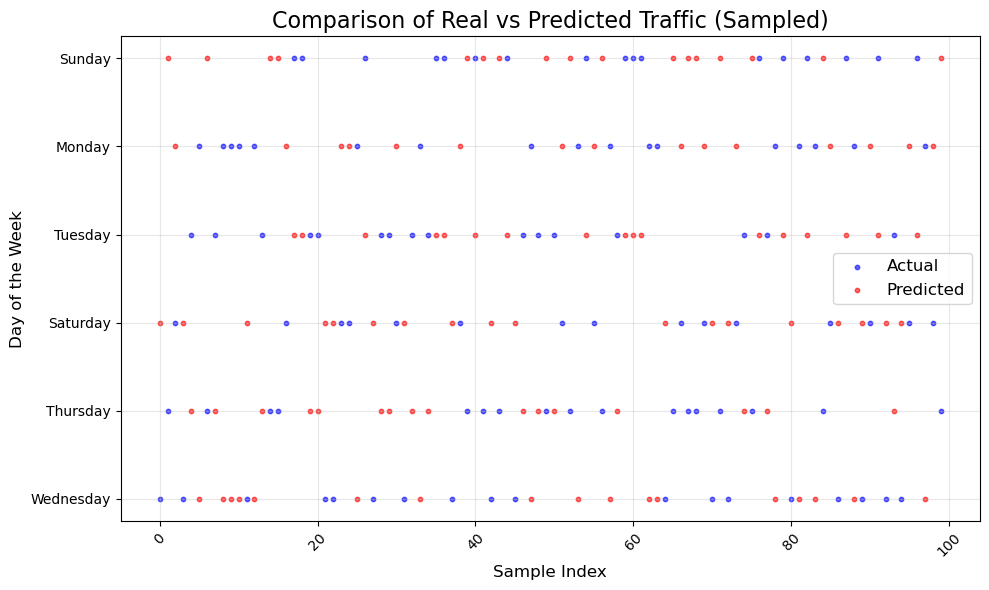

In [11]:
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Ensure Y_test is defined
# Example definition (use the appropriate method if already defined in your context)
# Assuming Y_test is a list or NumPy array of encoded labels for the test dataset
# Replace `['Saturday', 'Sunday', ...]` with the actual day labels in your dataset
Y_test = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'] * 20  # Example data

# Assuming `predicted_days` is a list of predicted day labels from your model
# Replace `['Monday', 'Tuesday', ...]` with the actual predicted labels from your model
predicted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday', 'Sunday'] * 20  # Example predictions

# Encoding the day labels
all_days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']
label_encoder = LabelEncoder()
label_encoder.fit(all_days)

# Encode the test and predicted values
Y_test_encoded = label_encoder.transform(Y_test)
predicted_encoded = label_encoder.transform(predicted_days)

# Visualization: Sample random points
sample_size = min(100, len(Y_test_encoded))  # Ensure sample size doesn't exceed available data
indices = random.sample(range(len(Y_test_encoded)), k=sample_size)

# Get actual and predicted values for the sampled indices
Y_test_sample = [label_encoder.inverse_transform([Y_test_encoded[i]])[0] for i in indices]
predict_sample = [label_encoder.inverse_transform([predicted_encoded[i]])[0] for i in indices]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(sample_size), Y_test_sample, color='blue', label='Actual', alpha=0.6, s=10)
plt.scatter(range(sample_size), predict_sample, color='red', label='Predicted', alpha=0.6, s=10)
plt.title('Comparison of Real vs Predicted Traffic (Sampled)', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
